## Importing Libraries

In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
import pickle
#from mlxtend.plotting import plot_decision_regions

## Reading the Data

In [95]:
df = pd.read_csv('placement-dataset.csv')
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [97]:
df.shape

(100, 4)

## Preprocessing

In [100]:
df.isnull().sum()   #number of null values

city         0
cgpa         8
iq           4
placement    0
dtype: int64

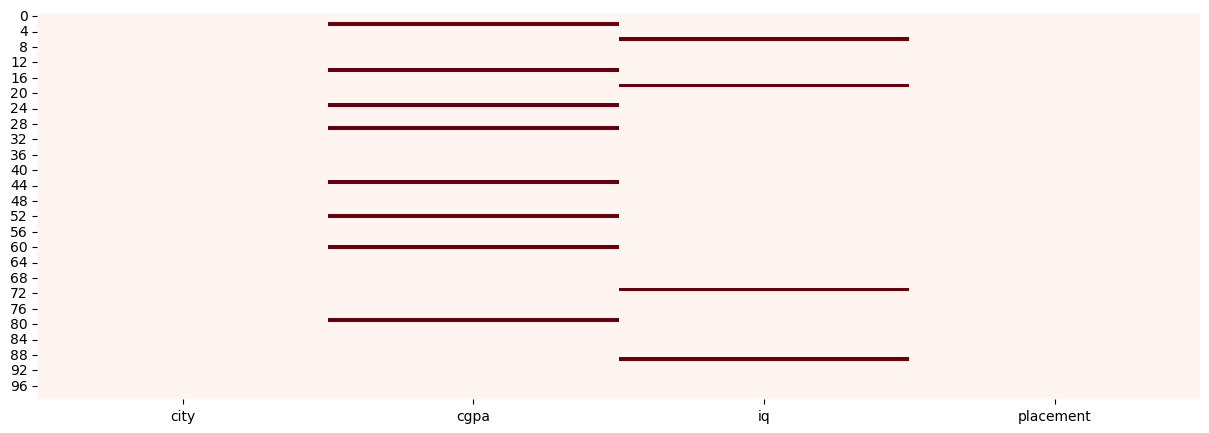

In [102]:
plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(df.isnull(),cmap='Reds', cbar = False,color='red')
plt.show() # display the plot

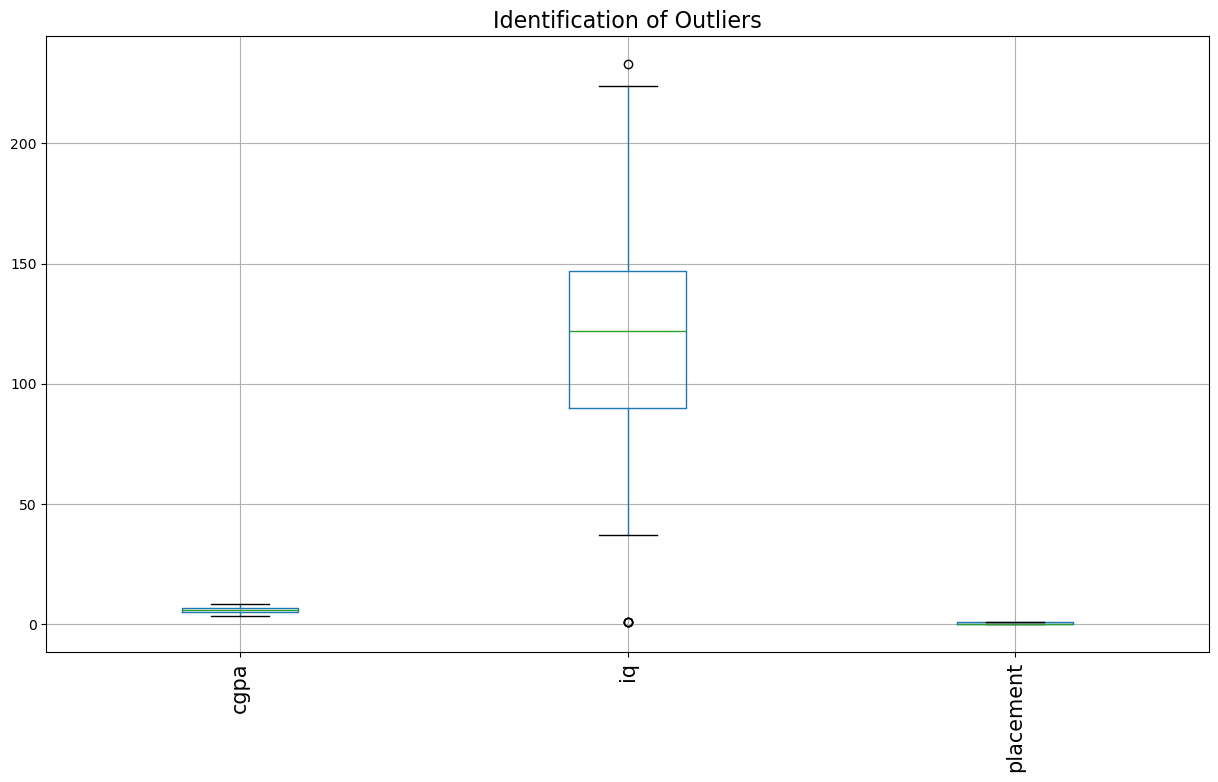

In [104]:
plt.figure(figsize=(15,8))  #setting figure size
df.boxplot() #ploting boxplot
plt.title('Identification of Outliers',fontsize=16)  #Title of plot
plt.xticks(rotation = 'vertical', fontsize = 15) #x-axis labels
plt.show() #Diplaying the plot

In [106]:
df['cgpa'].fillna(df['cgpa'].mean(),inplace=True)

C:\Users\prakhar\AppData\Local\Temp\ipykernel_2016\815226.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cgpa'].fillna(df['cgpa'].mean(),inplace=True)


In [112]:
df

,city,cgpa,iq,placement
0,New York,6.800000,123.0,1
1,Los Angeles,5.900000,106.0,0
2,Chicago,5.965217,121.0,0
3,New York,7.400000,132.0,1
4,Los Angeles,5.800000,142.0,0
...,...,...,...,...
95,Chicago,4.300000,200.0,0
96,New York,4.400000,42.0,0
97,Los Angeles,6.700000,182.0,1
98,Chicago,6.300000,103.0,1


In [114]:
df.isna().sum()

city         0
cgpa         0
iq           4
placement    0
dtype: int64

In [116]:
df['iq'].fillna(df['iq'].median(),inplace=True)

C:\Users\prakhar\AppData\Local\Temp\ipykernel_2016\70199518.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['iq'].fillna(df['iq'].median(),inplace=True)


In [118]:
df.isna().sum()   # No null values present

city         0
cgpa         0
iq           0
placement    0
dtype: int64

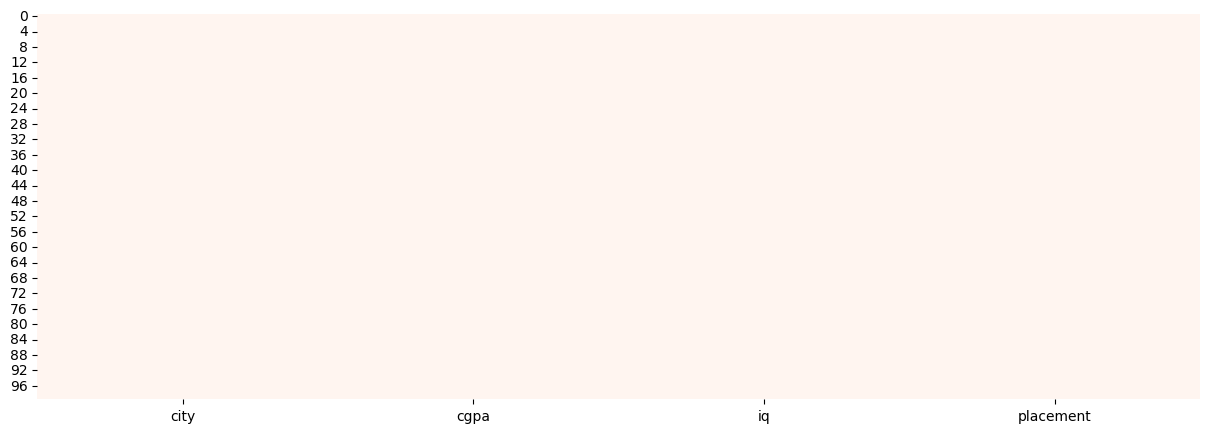

In [120]:
# No null values present in the dataset as shown in the figure

plt.rcParams["figure.figsize"]=[15,5]
sns.heatmap(df.isnull(),cmap='Reds', cbar = False,color='red')
plt.show() # display the plot

In [124]:
df

,cgpa,iq,placement
0,6.800000,123.0,1
1,5.900000,106.0,0
2,5.965217,121.0,0
3,7.400000,132.0,1
4,5.800000,142.0,0
...,...,...,...
95,4.300000,200.0,0
96,4.400000,42.0,0
97,6.700000,182.0,1
98,6.300000,103.0,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


## EDA

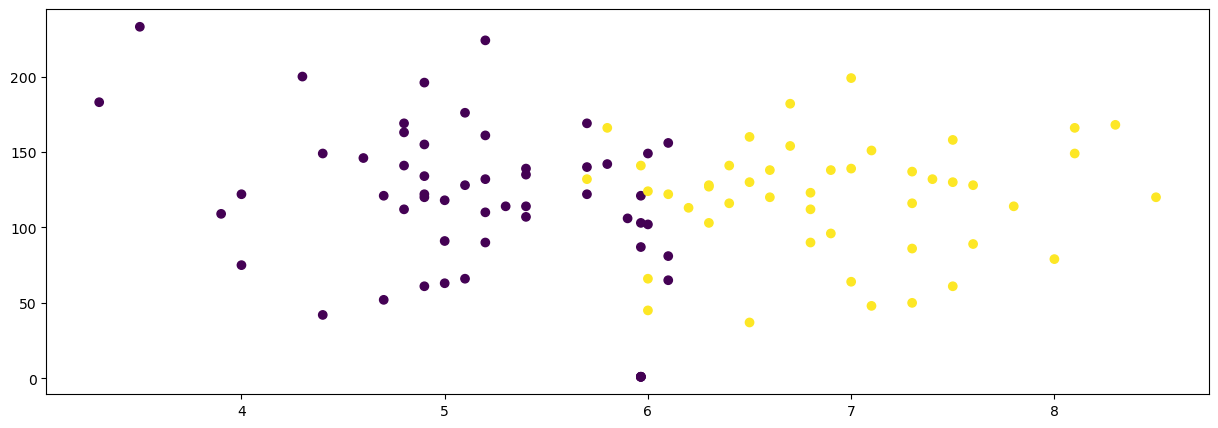

In [136]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


## Feature Selection

In [139]:
# Ignore in this dataset as it is a small dataset

## Extracting Input and Output Column

In [142]:
X = df.iloc[:,:-1]

In [146]:
X.head()

,cgpa,iq
0,6.800000,123.0
1,5.900000,106.0
2,5.965217,121.0
3,7.400000,132.0
4,5.800000,142.0


In [148]:
y = df.iloc[:,-1]

In [150]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

## Splitting the data to Train and Test

In [177]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [179]:
X_train.head(2)

,cgpa,iq
95,4.3,200.0
19,5.2,132.0


In [181]:
y_train.head(2)

95    0
19    0
Name: placement, dtype: int64

In [185]:
X_test.head(2)

,cgpa,iq
52,5.965217,1.0
28,5.200000,90.0


In [187]:
y_test.head(2)

52    0
28    0
Name: placement, dtype: int64

## Scaling the data

In [196]:
scaler = StandardScaler()

In [198]:
X_train = scaler.fit_transform(X_train)

In [202]:
X_test = scaler.transform(X_test)

In [204]:
X_train

array([[-1.48772482,  1.80246445],
       [-0.6552531 ,  0.2938372 ],
       [-0.93274368,  1.71372167],
       [ 0.05254894, -2.61248881],
       [-1.21023425,  0.60443693],
       [-0.47025939,  0.44913706],
       [ 1.93465892, -0.88200462],
       [ 0.08472176,  0.11635164],
       [ 0.05254894,  0.04979456],
       [ 0.82469662, -0.63796198],
       [ 0.91719348, -0.50484781],
       [ 2.21214949,  1.09252221],
       [ 2.02715577,  1.04815082],
       [ 0.63970291,  0.42695137],
       [-1.11773739,  0.04979456],
       [-1.02524053,  1.11470791],
       [ 0.08472176, -1.17041865],
       [ 0.05254894, -2.61248881],
       [-0.93274368, -1.28134713],
       [ 0.36221233,  0.18290873],
       [ 0.73219976,  0.78192249],
       [-0.0077751 , -0.28299086],
       [ 1.47217463, -1.28134713],
       [ 0.17721862, -0.83763323],
       [-0.19276881,  1.11470791],
       [ 0.91719348,  0.42695137],
       [-0.93274368,  0.07198025],
       [-1.39522797, -1.70287533],
       [-1.7652154 ,

In [206]:
X_test

array([[ 0.05254894, -2.61248881],
       [-0.6552531 , -0.63796198],
       [-0.74774996,  1.27000777],
       [-0.10027196,  1.04815082],
       [ 2.02715577,  0.67099401],
       [-0.19276881,  0.47132276],
       [ 1.28718091, -1.52538977],
       [-0.56275625, -0.1055053 ],
       [ 1.7496652 , -0.1055053 ],
       [ 2.3971432 ,  0.02760886]])

## Model training and Selection

In [217]:
clf = LogisticRegression()

In [231]:
a = clf.fit(X_train,y_train)

In [223]:
predictions = clf.predict(X_test)

In [229]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 1], dtype=int64)

LogisticRegression()

## Model Evaluation

In [237]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [249]:
confusion_matrix(y_test,predictions)

array([[5, 0],
       [1, 4]], dtype=int64)

In [239]:
from sklearn.metrics import accuracy_score

In [241]:
accuracy_score(y_test,predictions)

0.9

In [252]:
# Visualize the pattern created by model

## Deployment

In [261]:
pickle.dump(clf,open('model.pkl','wb'))